In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload()

Saving edges.csv to edges.csv
Saving gprops.csv to gprops.csv
Saving nodes.csv to nodes.csv


In [4]:
df_edges = pd.read_csv("edges.csv")
df_edges.head()

,# source,target
0,0,1
1,1,2
2,1,3
3,1,4
4,1,6


In [105]:
df_nodes = pd.read_csv("nodes.csv")
df_nodes.head()

,# index,id,name,group,_pos
0,0,1,Samir_Kashk,4,"array([-0.45667855, 1.52013403])"
1,1,5,Essid_Sami_Ben_Khemais,4,"array([-0.54533753, 1.40311565])"
2,2,2,Madjid_Sahoune,4,"array([-0.43868948, 1.36990559])"
3,3,3,Fahid_al_Shakri,4,"array([-0.40985337, 1.43747162])"
4,4,4,Lased_Ben_Heni,4,"array([-0.47601296, 1.45845923])"


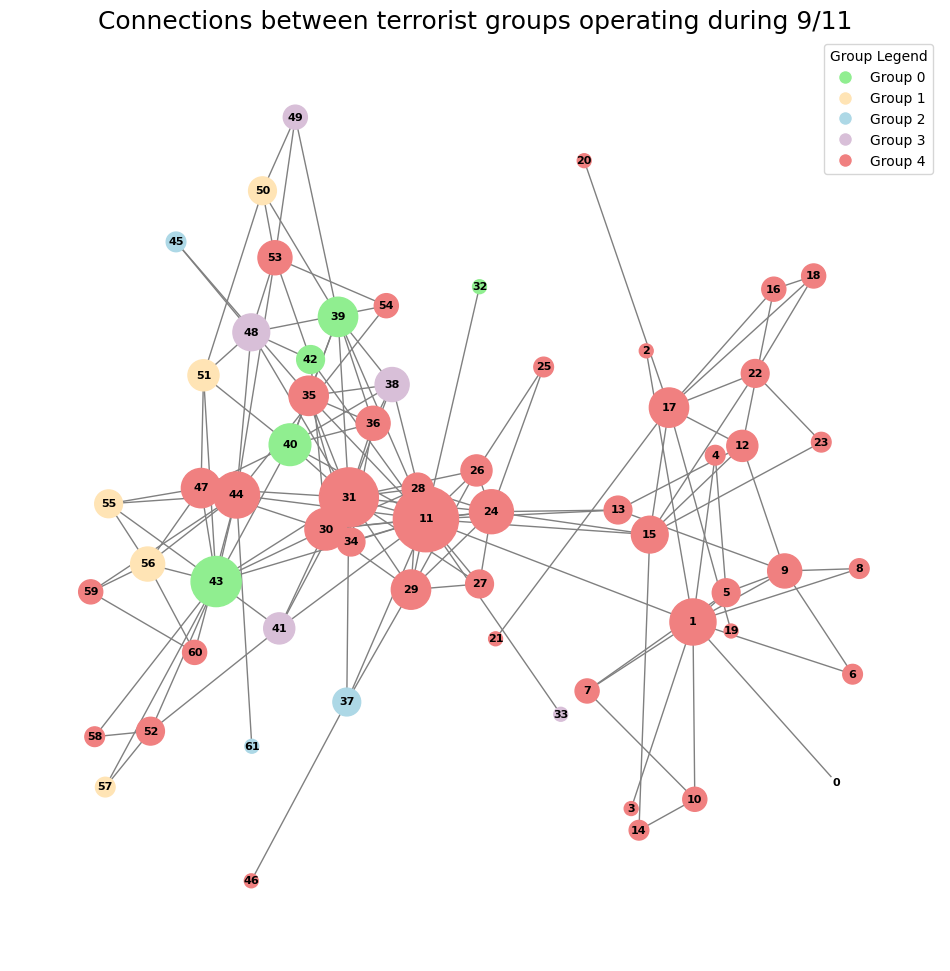

In [125]:
terrorists_graph = nx.from_pandas_edgelist(df_edges, "# source", " target")

node_attributes = df_nodes.set_index(' id')[' group'].to_dict()
nx.set_node_attributes(terrorists_graph, node_attributes, 'group')

node_degrees = dict(terrorists_graph.degree())
node_sizes = [v * 100 for v in node_degrees.values()]

group_colors = {0: 'lightgreen', 1: 'moccasin', 2: 'lightblue', 3: 'thistle', 4: 'lightcoral'}

node_colors = [group_colors[node_attributes[node]] if node in node_attributes else missing_color for node in terrorists_graph.nodes()]

pos = nx.spring_layout(terrorists_graph, seed=44, k=0.4)

fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.set_title("Connections between terrorist groups operating during 9/11", fontsize=18)

nx.draw(terrorists_graph, pos, with_labels=True, font_weight='bold', node_size=node_sizes, node_color=node_colors, font_size=8, edge_color="gray")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f"Group {label}") for label, color in group_colors.items()]
plt.legend(handles=legend_handles, title='Group Legend')

plt.show()